In [1]:
from pyo import *
import os
import matplotlib.pyplot as plt
import numpy as np
import time

# Some theory
- A is at 440Hz, 880Hz, 1760Hz, 3520Hz etc. (octaves)
- 12 notes separated with $\sqrt[12]{2}$
- 100 BPMs is 1.67 Hz is 0.6 sec; 150 BPMs is 2.5 Hz is 0.4 sec; 180 BPMs is 3 Hz is 0.33 sec
- Humans can hear from about 20 Hz to about 20000 Hz

# Boot server

In [12]:
#https://www.martinjaroszewicz.com/book/pyoguide
# nchnls: Number of output channels. Default is 2.
# sr: Sampling rate. Default is 44100 which is the standard “CD Quality”, make sure your sound files and the server have the same sample rates.
# buffersize: Defaults to 256.
# duplex: Duplex: Input - output mode. 0 is output only and 1 is both ways. Defaults to 1.

#input_names, input_indexes  = pa_get_input_devices()
#output_names, output_indexes = pa_get_output_devices()
#pa_list_devices()

s = Server(sr = 48000,duplex=0,nchnls=1)
s.boot()

s.start()
s.amp=0.9

Pyo warning: Portaudio output device `HDA Intel PCH: ALC289 Analog (hw:0,0)` has fewer channels (0) than requested (1).
Portaudio error in Pa_OpenStream: Invalid number of channels
Pyo error: From portaudio, Invalid number of channels
Portaudio error in Pa_CloseStream (pa_deinit): PortAudio not initialized
Portaudio error in Pa_Terminate (pa_deinit): PortAudio not initialized
Pyo error: 
Server not booted.
Pyo warning: The Server must be booted before calling the start method!


In [13]:
#s.stop()
#s.shutdown()

# Play a sound file (Signal flow Player)

In [23]:
# path: Full path name of the sound to read.
# speed: A change in playback speed is analogous to the playback of a tape. A slower speed will lower the perceived pitch. You can also provide a negative number to play backwards to create interesting effects.
# loop: Indefinitely repeats playback.
# offset The starting time in seconds where playback should start offset from the beginning of the file.
sf = SfPlayer("./file_example_WAV_5MG.wav", speed=1, loop=True)
sf.out()

< Instance of SfPlayer class >

In [24]:
sf.stop()

< Instance of SfPlayer class >

In [25]:
spec = Spectrum(sf, size=1024)

In [19]:
sf.out()

< Instance of SfPlayer class >

In [18]:
fol = Follower(sf, freq=30)
n = Noise(mul=fol).out(1)

AttributeError: 'Follower' object has no attribute 'getTable'

In [21]:
n.stop()

< Instance of Noise class >

# Record sound from microphone (to be checked...)

In [8]:
#select input (inputs can be found by printing the result of pa_get_input_devices()
#s.setInputDevice(1)

#select channel
#input = Input(0)

#Create recording object and start recording
#recordingOutputPath = os.path.join("./recording.wav")
#rec = Record(input,filename=recordingOutputPath)

#Keep the loop active for 5 seconds
#time.sleep(5)

#Stop the recording. Important! If the recording isn't stopped python will crash.
#rec.stop()
#Also one can free the objects by using Pyo's Clean_objects
#clean = Clean_objects(5, rec)
#clean.start()

In [9]:
# Play recording
#sf = SfPlayer("./recording.wav", speed=1, loop=True)
#sf.out()

# Sound generators

### Sine-tones

In [10]:
# Creates a sine wave as the source to process.
# Inputs:
# freq: Frequency in cycles per second. Defaults to 1000.
# phase: Phase of sampling, expressed as a fraction of a cycle (0 to 1). Defaults to 0.
# The `mul` attribute multiplies each sample by its value.
# The `add` attribute adds an offset to each sample.
freq = 440 # Hz
a = Sine(freq=freq, mul=.1)
b = Sine(freq=freq*1/12, mul=0.05)
a.out()
b.out()

< Instance of Sine class >

In [11]:
# never forget to stop the sounds
#a.stop()
b.stop()

< Instance of Sine class >

In [12]:
# Visualize it (to be checked)
#sc = Scope(a)
#sp = Spectrum(a)

Multiple processes on a single source.

In [13]:
# Passes the sine wave through an harmonizer.
# Harmonizer: Generates harmonizing voices in synchrony with its audio input.
hr = Harmonizer(a).out()

In [14]:
hr.stop()

< Instance of Harmonizer class >

In [15]:
# Also through a chorus.
# A chorus effect occurs when individual sounds with roughly the same timbre 
# and nearly (but never exactly) the same pitch converge and are perceived as one.
ch = Chorus(a).out()

In [16]:
ch.stop()

< Instance of Chorus class >

In [17]:
# And through a frequency shifter.
sh = FreqShift(a).out()
sh.stop()

< Instance of FreqShift class >

In [18]:
a.stop()

< Instance of Sine class >

Chaining processes on a single source.

In [19]:
s.amp = 0.9
# Creates a sine wave as the source to process.
a = Sine(mul=.1).out(0)
# Passes the sine wave through an harmonizer.
h1 = Harmonizer(a).out()
# Then the harmonized sound through another harmonizer.
h2 = Harmonizer(h1).out()
# And again...
#h3 = Harmonizer(h2).out()
# And again...
#h4 = Harmonizer(h3).out()

In [20]:
a.stop()

< Instance of Sine class >

Multiple sines

In [21]:
# Sets fundamental frequency
freq = 200

s.amp = 0.1

# Approximates a triangle waveform by adding odd harmonics with
# amplitude proportional to the inverse square of the harmonic number.
h1 = Sine(freq=freq, mul=1).out()
h2 = Sine(freq=freq * 3, phase=0.5, mul=1.0 / pow(3, 2)).out()
#h3 = Sine(freq=freq * 5, mul=1.0 / pow(5, 2)).out()
#h4 = Sine(freq=freq * 7, phase=0.5, mul=1.0 / pow(7, 2)).out()
#h5 = Sine(freq=freq * 9, mul=1.0 / pow(9, 2)).out()
#h6 = Sine(freq=freq * 11, phase=0.5, mul=1.0 / pow(11, 2)).out()

In [22]:
h1.stop()
h2.stop()
#h3.stop()
#h4.stop()
#h5.stop()
#h6.stop()

< Instance of Sine class >

In [23]:
### Using multichannel-expansion to create a square wave ###

# Sets fundamental frequency.
freq = 100
# Sets the highest harmonic.
high = 20

# Generates the list of harmonic frequencies (odd only).
harms = [freq * i for i in range(1, high) if i % 2 == 1]
# Generates the list of harmonic amplitudes (1 / n).
amps = [0.33 / i for i in range(1, high) if i % 2 == 1]

# Creates all sine waves at once.
a = Sine(freq=harms, mul=amps)
# Prints the number of streams managed by "a".
print(len(a))

# The mix(voices) method (defined in PyoObject) mixes
# the object streams into `voices` streams.
b = a.mix(voices=1).out()

10


In [24]:
b.stop()

< Instance of Mix class >

### Tables 

In [25]:
# Non-table sine wave generator
sine = Sine(400,mul=0.2)
#Using a cosine table
cosine = CosTable([(0,0.0),(4096,1.0),(8191,0.0)])
#Using a square table of order 1
square =  SquareTable(order=1).normalize()
square10 =  SquareTable(order=10).normalize()
#Using a triangle table
triangle100 = TriangleTable(order=100).normalize()

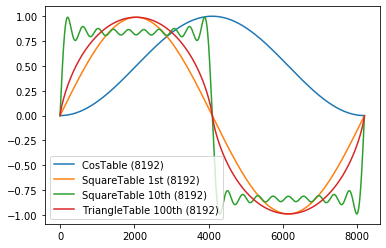

In [26]:
plt.plot(cosine.getTable(), label='CosTable (%i)'%len(cosine.getTable()))
plt.plot(square.getTable(), label='SquareTable 1st (%i)'%len(square.getTable()))
plt.plot(square10.getTable(), label='SquareTable 10th (%i)'%len(square10.getTable()))
plt.plot(triangle100.getTable(), label='TriangleTable 100th (%i)'%len(triangle100.getTable()))
plt.legend(loc=0)

In [27]:
# To playback a table, we need and oscillator to read its values at the desired frequency
#osc = Osc(table=cosine, freq=880, mul=.25).out()
osc = Osc(table=square, freq=880, mul=.25).out()
#osc = Osc(table=square10, freq=880, mul=.25).out()

In [28]:
osc.stop()

< Instance of Osc class >

### Envelope

In [29]:
envelopePoints = LinTable([(0,0), (100,1), (1000,.25), (8191,0)])

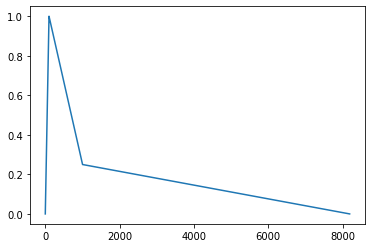

In [30]:
plt.plot(envelopePoints.getTable())

In [31]:
envelope = Osc(table=envelopePoints, freq=1, mul=.25)

In [32]:
envelope.out()

< Instance of Osc class >

In [33]:
envelope.stop()

< Instance of Osc class >

In [34]:
pink = PinkNoise(mul=envelope).mix(2).out()

In [35]:
pink.stop()

< Instance of Mix class >

Play envelope with trig

In [36]:
def play_with_rests():
    for i in range(1,5):
        t.play()
        time.sleep(2)
    #s.stop()

envelopePoints = LinTable([(0,0), (100,1), (1000,.25), (8191,0)])
#envelope = Osc(table=envelopePoints, freq=1, mul=.25)
#Triggers once
t=Trig()
tenv = TrigEnv(t, table=envelopePoints, dur=1, mul=.3)
pink = PinkNoise(mul=tenv).mix(2).out()
play_with_rests()

### Noise 

In [37]:
s.amp = 0.1

# Creates a source (white noise)
n = Noise()
n.out()

< Instance of Noise class >

In [38]:
# Sends the bass frequencies (below 1000 Hz) to the left
#ButLP: A second-order Butterworth lowpass filter. ButLP implements a second-order 
# IIR Butterworth lowpass filter, which has a maximally flat passband and a very good 
# precision and stopband attenuation.
lp = ButLP(n).out()

In [39]:
# Sends the high frequencies (above 1000 Hz) to the right
hp = ButHP(n).out(1)

In [40]:
n.stop()

< Instance of Noise class >

Another example of noise

In [41]:
# Creates a noise source
n = Noise()

In [42]:
# Creates an LFO oscillating +/- 500 around 1000 (filter's frequency)
lfo1 = Sine(freq=0.1, mul=5000, add=1000)
# Creates an LFO oscillating between 2 and 8 (filter's Q)
lfo2 = Sine(freq=0.4).range(2, 8)
# Creates a dynamic bandpass filter applied to the noise source
bp1 = ButBP(n, freq=lfo1, q=lfo2).out()

In [43]:
# The LFO object provides more waveforms than just a sine wave

# Creates a ramp oscillating +/- 1000 around 12000 (filter's frequency)
#lfo3 = LFO(freq=0.25, type=1, mul=1000, add=1200)
lfo3 = LFO(freq=0.1, type=1, mul=100000, add=1200)
# Creates a square oscillating between 4 and 12 (filter's Q)
lfo4 = LFO(freq=4, type=2).range(4, 12)
# Creates a second dynamic bandpass filter applied to the noise source
bp2 = ButBP(n, freq=lfo3, q=lfo4).out(1)

In [44]:
bp1.stop()

< Instance of ButBP class >

In [45]:
bp2.stop()

< Instance of ButBP class >

# Triggers

### Oscillator

In [51]:
cosine = CosTable([(0,0.0),(4096,1.0),(8191,0.0)])
osc = Osc(table=cosine, freq=880, mul=.25).out()

In [52]:
osc.stop()

< Instance of Osc class >

### Trigger

In [53]:
envelopePoints = LinTable([(0,0), (100,1), (1000,.25), (8191,0)])
#envelope = Osc(table=envelopePoints, freq=1, mul=.25)
#Triggers once
t=Trig()

# Envelope reader generator.
# TrigEnv starts reading an envelope in dur seconds each time it receives a trigger in its input parameter.
tenv = TrigEnv(t, table=envelopePoints, dur=10, mul=1)

In [54]:
t.out()

< Instance of Trig class >

In [55]:
t.stop()

< Instance of Trig class >

# Sequence control

In [1]:
# Metro

In [2]:
# Counter
m = Metro(.125).play()
c = Counter(m, min=3, max=8, dir=2, mul=100) # minimum, maximum, dir: 0: up, 1: down, 2: up and down: up-and-down, mul: multiplication factor
a = Sine(freq=c, mul=.2).mix(2).out()

NameError: name 'Metro' is not defined

In [46]:
#Select takes in input an audio signal containing integer numbers and sends a trigger when the input matches value parameter. This object is especially designed to be used with Counter object.
env = HannTable()
m = Metro(.125, poly=2).play()
te = TrigEnv(m, table=env, dur=.2, mul=.2)
c = Counter(m, min=0, max=4)
se = Select(c, 0)
tr = TrigRand(se, 400, 600)
a = Sine(freq=tr, mul=te).out()

In [47]:
# TrigChoice chooses randomly a new value in list choice each time it receives a trigger in its input parameter. The value is kept until the next trigger.
t = CosTable([(0,0), (50,1), (250,.3), (8191,0)])
met = Metro(.125, poly=2).play()
freq = TrigChoice(met, [300, 350, 400, 450, 500, 550])
amp = TrigEnv(met, table=t, dur=.25, mul=.3)
a = Sine(freq=freq, mul=amp).out()

In [48]:
a.stop()

< Instance of Sine class >

# Beat 1

In [56]:
# Configuring beat(s)

# Square waveform generator.
# Generates square waveforms made up of fixed number of harmonics.
wsv = SquareTable()

# Generates isochronous trigger signals.
time=1; poly=1
#time=0.4; poly=2
beat = Metro(time=time/2,poly=poly).play()
beat2 = Metro(time=time/4,poly=poly).play()
beat3 = Metro(time=time*2,poly=poly).play()

# Amplitude envelope shape
# Construct a table from cosine interpolated segments.
envelope = CosTable([(0,0),(500,1),(800,.2),(8191,0)])
envelope2 = CosTable([(0,0),(100,1),(500,.1),(8191,0)])
envelope3 = CosTable([(0,0),(100,1),(4000,.1),(8191,0)])

# TrigEnv(input, table, dur=1, interp=2, mul=1, add=0)
# TrigEnv starts reading an envelope in dur seconds each time it receives a trigger in its input parameter.
#dur = .25; mul = 0.7
dur = 0.5; mul = 1.0
amplitude = TrigEnv(beat,table=envelope,dur=dur,mul=mul)
amplitude2 = TrigEnv(beat2,table=envelope2,dur=dur/2,mul=mul/6)
amplitude3 = TrigEnv(beat3,table=envelope3,dur=dur,mul=mul/10)

# random notes
# TrigXnoiseMidi(input, dist=0, x1=0.5, x2=0.5, scale=0, mrange=(0, 127), mul=1, add=0)
# Xnoise implements a few of the most common noise distributions. 
# A new value is generated each time the object receive a trigger in input. 
# Each distribution generates integer values in the range defined with mrange parameter and 
# output can be scaled on midi notes, hertz or transposition factor.
pitch = TrigXnoiseMidi(beat,dist=1,scale=0,mrange=(20,21))
pitch2 = TrigXnoiseMidi(beat2,dist=1,scale=0,mrange=(50,58))
pitch3 = TrigXnoiseMidi(beat3,dist=1,scale=0,mrange=(80,85))

In [77]:
# Oscillator
#oscillator = Osc(table=wsv,freq=pitch,mul=amplitude).out()
oscillator = Osc(table=wsv,freq=20,mul=amplitude).out()
#oscillator = Osc(table=wsv,freq=pitch2,mul=0.2).out()
#time.sleep(2)

In [78]:
oscillator2 = Osc(table=wsv,freq=pitch2,mul=amplitude2).out()

In [79]:
oscillator3 = Osc(table=wsv,freq=pitch3,mul=amplitude3).out()

In [80]:
oscillator.stop()
oscillator2.stop()
oscillator3.stop()

< Instance of Osc class >

In [ ]:
plt.plot(list(envelope.getTable()))
plt.plot(list(envelope2.getTable()))
plt.plot(list(envelope3.getTable()))

# Synth

In [49]:
# synth signal shape
sig = SawTable(order=12).normalize()
#sig = ListTable([(0,20), (200,5), (1000,2), (8191,1)])

# tempo
metro_synth = Metro(time=0.125, poly=2).play()

# LFO filter
lfo = LFO(freq=2.2, sharp=0.2, type=4, mul=110, add=220)

# synth envelope
envelope_synth = TrigEnv(metro_synth, table=sig, dur=0.5)

# triggering a synth
synth = FM(carrier=[220.5,220], ratio=[.2498, .2503], index=envelope_synth, mul=0.2).out()

In [50]:
synth2 = FM(carrier=lfo, ratio=[.2498, .2503], index=envelope_synth, mul=0.3).out()

In [ ]:
# FM example
x = np.arange(0,2*np.pi,0.01)
omega_c = 2*np.pi*3
yc = np.sin(omega_c*x)
omega_m = 1.5*omega_c
beta = 1.4
ym = beta*np.sin(omega_m*x)
ytotal = np.sin(omega_c*x+beta*np.sin(omega_m*x))
plt.plot(x,yc)
plt.plot(x,ym)
plt.show()
plt.plot(x,ytotal)

In [51]:
synth.stop()

< Instance of FM class >

In [52]:
synth2.stop()

< Instance of FM class >

In [53]:
# 80s
lfd = Sine([.4,.2], mul=.2, add=.5)
synth_80 = SuperSaw(freq=440, detune=lfd, bal=0.5, mul=0.2).out()

In [54]:
synth_80.stop()

< Instance of SuperSaw class >

In [55]:
# 12 streams with different combinations of `freq` and `ratio`.
a = SumOsc(
    freq=[100, 150.2, 200.5, 250.7],
    ratio=[0.501, 0.753, 1.255],
    index=[0.3, 0.4, 0.5, 0.6, 0.7, 0.4, 0.5, 0.3, 0.6, 0.7, 0.3, 0.5],
    mul=0.05,
)
# Freeverb is a reverb unit generator based on Jezar’s public domain C++ sources, 
# composed of eight parallel comb filters, followed by four allpass units in series. 
# Filters on each stream are slightly detuned in order to create multi-channel effects.
rev = Freeverb(a.mix(2), size=0.80, damp=0.70, bal=0.30).out()


In [56]:
a.stop()
rev.stop()

< Instance of Freeverb class >

# More Advanced Examples

#### Now let's write our first 4 voices composition!

In [57]:
pitches = [midiToHz(m) for m in [36,43,48,55,60,62,64,65,67,69,71,72]]

# Add more voices here to generate a simple counterpoint
choice = Choice(choice=pitches, freq=2)
ch_port = Port(choice, risetime=.001, falltime=.001)

# Two simple instruments
lfdetune = Sine(freq=0.1, mul=.07, add=.07)
instrument1 = SuperSaw(freq=ch_port, detune=lfdetune, mul=.1)
lfind = Sine(freq=0.1, phase=0.5, mul=3, add=3)
instrument2 = FM(carrier=ch_port, ratio=1.0025, index=lfind, mul=.025)

# Send instruments output to delay
src_sum = instrument1.mix(2) + instrument2.mix(2)
lfdel = Sine(.1, mul=.003, add=.005)
comb = Delay(src_sum, delay=lfdel, feedback=.5)

# Send two resulting signals to reverb and output
out_sum = src_sum + comb
rev = STRev(out_sum, cutoff=3500, bal=.5, roomSize=2, mul=0.5).out()

In [58]:
instrument1.out()

< Instance of SuperSaw class >

In [59]:
instrument1.stop()

< Instance of SuperSaw class >

In [60]:
rev.stop()

< Instance of STRev class >

#### Playing with triggers and performing our first canon :)

In [61]:
# Builds an amplitude envelope in a linear table
env = LinTable([(0,0), (190,.8), (1000,.5), (4300,.1), (8191,0)], size=8192)
plt.plot(env.getTable())

# Metronome provided by Beat
met = Beat(time=.125, taps=16, w1=90, w2=50, w3=30).play()

# Reads the amp envelope for each trigger from Beat
amp = TrigEnv(met, table=env, dur=met['dur'], mul=met['amp'])

# Generates a midi note for each trigger from Beat in a pseudo-random distribution
fr = TrigXnoiseMidi(met, dist=12, x1=1, x2=.3, scale=0, mrange=(48,85))

# Receives the midi note from XnoiseMidi and scale it into C harmonic minor (try others!)
# input: PyoObject, Incoming Midi notes as an audio stream.
# choice: list of floats Possible values, as midi notes, for output.
# scale: int {0, 1, 2}, optional, Pitch output format, MIDI (default), Hertz, transposition factor
frsnap = Snap(fr, choice=[0,2,3,5,7,8,11], scale=1)

# This instrument receives a frequency from Snap and molde it inside an envelop from TrigEnv
lfo = Sine(freq=.05, mul=.05, add=.08)
gen = SineLoop(freq=frsnap, feedback=lfo, mul=amp*.5).out(0)

# Output the same signal with some delay in the right speaker (try a 'real' counterpoint!)
rev = Delay(gen, delay=[.25, .5], feedback=.3, mul=.8).out(1)

In [62]:
rev.stop()

< Instance of Delay class >

In [63]:
gen.stop()

< Instance of SineLoop class >

#### MIDI out

In [71]:
def playsoprano():
    s.sendMidiNote(choice([60, 62, 63, 65, 67, 68, 71]), randint(30,100), channel=1)

def playtenor():
    s.sendMidiNote(choice([48, 50, 51, 53, 55, 56, 59]), randint(50,60), channel=2)

def playbass():
    s.sendMidiNote(choice([36, 36, 36, 41, 48]), randint(80,100), channel=3)

met = Beat(time=.5, taps=16, w1=80, w2=60, w3=40).play()
p = TrigFunc(met, playsoprano).play()

met2 = Beat(time=1, taps=16, w1=70, w2=50, w3=30).play()
p2 = TrigFunc(met2, playtenor).play()

met3 = Beat(time=1, taps=16, w1=100, w2=20, w3=10).play()
p3 = TrigFunc(met3, playbass).play()

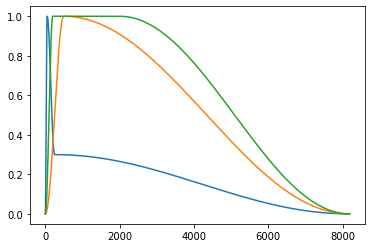

< Instance of Mixer class >

In [72]:
def midiToFrequency(midi):

    return round(440 * math.pow(2,(midi-69)/12))

#MIDI NOTES
l1 = [64, 67, 71, 72, 76, 72,71,67]
melody = []
bass = []
padFreq = midiToFrequency(40)
#Frequencies
for note in l1:
    melody.append(midiToFrequency(note-12))
    bass.append(midiToFrequency(note-24))

#tables
t = CosTable([(0,0), (50,1), (250,.3), (8191,0)])
t2 = CosTable([(0,0), (500,1), (8191,0)])
t3 = CosTable([(0,0), (200,1),(2000,1), (8191,0)])
plt.plot(t.getTable())
plt.plot(t2.getTable())
plt.plot(t3.getTable())
plt.show()
#melody
metMelody = Metro(time=.1, poly=2).play()
ampMelody = TrigEnv(metMelody, table=t, dur=.2, mul=.3)
itMelody = Iter(metMelody, choice=[melody]) # Triggers iterate over a list of values.
melodyOsc = Sine(freq=itMelody, mul=ampMelody)
#bass
metBass = Metro(time=.4, poly=2).play()
ampBass = TrigEnv(metBass, table=t2, dur=.2, mul=.3)
itBass = Iter(metBass, choice=[bass])
square =  SquareTable(order=15).normalize()
oscSquare = Osc(table=square, freq=itBass, mul=ampBass)

#pad
metPad = Metro(time=3.2, poly=2).play()
ampPad = TrigEnv(metPad, table=t3, dur=4, mul=.3)
itPad = Iter(metPad, choice=[padFreq])
triWave = TriangleTable()
oscPad = Sine(freq=itPad, mul=ampPad)


# Audio mixer.
# Mixer mixes multiple inputs to an arbitrary number of outputs with independant 
# amplitude values per mixing channel and a user defined portamento applied on amplitude changes.
mixer = Mixer()
mixer.addInput(0,melodyOsc)
mixer.addInput(1,oscSquare)
mixer.addInput(2,oscPad)

mixer.setAmp(0,0,0.5)
mixer.setAmp(0,1,0.5)
mixer.setAmp(1,0,0.1)
mixer.setAmp(1,1,0.1)
mixer.setAmp(2,0,0.4)
mixer.setAmp(2,1,0.4)
mixer.out()


In [73]:
mixer.stop()

< Instance of Mixer class >

In [64]:
s.stop()
s.shutdown()